## Rubric

Instructions: DELETE this cell before you submit via a `git push` to your repo before deadline. This cell is for your reference only and is not needed in your report. 

 Scoring: Out of 10 points

- Each Developing  => -2 pts
- Each Unsatisfactory/Missing => -4 pts
  - until the score is 0

If students address the detailed feedback in a future checkpoint they will earn these points back






|                                  | **Unsatisfactory**                                                                                                                                                                                                                                                                                                                        | **Developing**                                                                                                                                                                                                       | **Proficient**                                                                                                                                                                                            | **Excellent**                                                                                                                                                                            |
|----------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **EDA relevance**                | EDA is mostly neither relevant to the question nor helpful in figuring out how to address the question. Or the EDA does address the question, but many obviously relevant variables / analyses / figures were not included. | EDA is partly irrelevant/unhelpful. EDA missed one or two obvioulsy relevant analysis (distributions of single variables or relationships between variables) | EDA includes the obviously relevant / helpful variables in addressing the question.                                                              | Thorough EDA fully explored the dataset                                                                                                                 |
| **EDA analysis and description** | Many of the analyses are poor choices (e.g., using means instead of medians for obviously skewed data), or are poorly described in the text, or do not aid understanding the data                                                                                                                                                     | Some of the analyses are poor choices, or are poorly described in the text, or do not aid understanding the data                                                                                                 | All analyses are correct choices. Only one or two have minor issues in the text descriptions supporting them. Mostly they fit well with other elements of the EDA and support understanding the data  | All analyses are correct choices with clear text descriptions supporting them. The figures fit well with the other elements of the EDA, producing a clear understanding of the data. |
| **EDA figures**                  | Many of the figures are poor plot choices (e.g., using a bar plot to represent a time series where it would be better to use a line plot) or have poor aesthetics (including colormap, data point shape/color, axis labels, titles, annotations, text legibility) or do not aid understanding the data                                | Some of the figures are poor plot choices or have poor aesthetics. Some figures do not aid understanding the data                                                                                                | All figures are correct plot choices. Only one or two have minor questionable aesthetic choices. The figures mostly fit well with the other elements of the EDA and support understanding the data    | All figures are correct plot choices with beautiful aesthetics. The figures fit well with the other elements of the EDA, producing a clear understanding of the data.                |





# COGS 108 - EDA Checkpoint

## Authors

Instructions: REPLACE the contents of this cell with your team list and their contributions. Note that this will change over the course of the checkpoints

This is a modified [CRediT taxonomy of contributions](https://credit.niso.org). For each group member please list how they contributed to this project using these terms:
> Analysis, Background research, Conceptualization, Data curation, Experimental investigation, Methodology, Project administration, Software, Visualization, Writing – original draft, Writing – review & editing

Example team list and credits:
- Alice Anderson: Conceptualization, Data curation, Methodology, Writing - original draft
- Bob Barker:  Analysis, Software, Visualization
- Charlie Chang: Project administration, Software, Writing - review & editing
- Dani Delgado: Analysis, Background research, Visualization, Writing - original draft

# Research Question

Instructions: REPLACE the contents of this cell with your work, including any updates to recover points lost in your proposal feedback



## Background and Prior Work

Instructions: REPLACE the contents of this cell with your work, including any updates to recover points lost in your proposal feedback

# Hypothesis


Instructions: REPLACE the contents of this cell with your work, including any updates to recover points lost in your proposal feedback

## Data

### Data overview

Instructions: REPLACE the contents of this cell with your work, including any updates to recover points lost in your data checkpoint feedback


In [56]:
# Run this code every time when you're actively developing modules in .py files.  It's not needed if you aren't making modules
#
## this code is necessary for making sure that any modules we load are updated here 
## when their source code .py files are modified

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:
# Setup code -- Run only once after cloning!!! 
#
# this code downloads the data from its source to the `data/00-raw/` directory
# if the data hasn't updated you don't need to do this again!

# if you don't already have these packages (you should!) uncomment this line
%pip install requests tqdm seaborn scikit-learn scipy
import sys
sys.path.append('./modules') # this tells python where to look for modules to import

import get_data # this is where we get the function we need to download data

# replace the urls and filenames in this list with your actual datafiles
# yes you can use Google drive share links or whatever
# format is a list of dictionaries; 
# each dict has keys of 
#   'url' where the resource is located
#   'filename' for the local filename where it will be stored 
datafiles = [
    { 'url': 'https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/airline-safety/airline-safety.csv', 'filename':'airline-safety.csv'},
    { 'url': 'https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/bad-drivers/bad-drivers.csv', 'filename':'bad-drivers.csv'}
]

get_data.get_raw(datafiles,destination_directory='data/00-raw/')

Note: you may need to restart the kernel to use updated packages.


Overall Download Progress:   0%|          | 0/2 [00:00<?, ?it/s]

Successfully downloaded: airline-safety.csv


Overall Download Progress: 100%|██████████| 2/2 [00:00<00:00, 18.11it/s]

Successfully downloaded: bad-drivers.csv


### Dataset #1 

Instructions: REPLACE the contents of this cell and the one below with your work, including any updates to recover points lost in your data checkpoint feedback

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score



In [59]:
#dataset with school name, county name, enrollment total

hd2324 = pd.read_csv("./data/02-processed/HD23-24_Wrangled.csv")
hd2324 = hd2324.loc[hd2324["STABBR"] == "CA",:]
hd2324["COUNTYNM"] = hd2324["COUNTYNM"].str.lower()
hd2324


UNITID_2024_local_county_pop = hd2324.drop(["Unnamed: 0", "ADDR", "CITY", "STABBR", "ZIP"], axis=1)

student_pop = pd.read_csv("./data/02-processed/EF23-24_Wrangled.csv")
# EFLEVEl code 10 is for all students regardless of education level
student_pop = student_pop.loc[student_pop["EFLEVEL"] == 10,:].drop(["Unnamed: 0", "EFLEVEL"], axis=1)

school_meta_data = pd.merge(UNITID_2024_local_county_pop, student_pop,
                            how="left",
                            on="UNITID")
school_meta_data["COUNTYNM"] = school_meta_data["COUNTYNM"].str.upper().str[:-7]
school_meta_data = school_meta_data
school_meta_data


,UNITID,INSTNM,COUNTYNM,EFTOTAL
0,108232,Academy of Art University,SAN FRANCISCO,6320.0
1,108269,Academy of Chinese Culture and Health Sciences,ALAMEDA,122.0
2,108667,College of Alameda,ALAMEDA,5833.0
3,108807,Allan Hancock College,SANTA BARBARA,11104.0
4,108852,American Academy of Dramatic Arts-Los Angeles,LOS ANGELES,169.0
...,...,...,...,...
674,498748,CalCopa Massage School,ORANGE,19.0
675,498836,The Nurse Academy,SAN DIEGO,34.0
676,498872,Central Valley Barber College,STANISLAUS,101.0
677,499103,Homestead Schools-Costa Mesa,ORANGE,24.0


### Dataset #2
 as above, add any more copies of this that you need to given how many datasets you have

In [60]:
#data set with county offense info and county_population. County name is index
county_offense_data = pd.read_csv("./data/02-processed/ca2024_county_offense_rates.csv")
county_offense_data["offense_category_name"].value_counts()

property_crimes = [
    "Larceny/Theft Offenses",
    "Fraud Offenses",
    "Motor Vehicle Theft",
    "Destruction/Damage/Vandalism of Property",
    "Burglary/Breaking & Entering",
    "Stolen Property Offenses",
    "Embezzlement",
    "Arson",
    "Counterfeiting/Forgery",
    "Gambling Offenses"
]

violent_crimes = [
    "Sex Offenses",
    "Assault Offenses",
    "Homicide Offenses",
    "Prostitution Offenses",  # often considered victim-oriented
    "Sex Offenses, Non-forcible",
    "Weapon Law Violations",
    "Kidnapping/Abduction",
    "Robbery",
    "Animal Cruelty",
    "Pornography/Obscene Material",  # linked to exploitation/harm
    "Extortion/Blackmail",
    "Human Trafficking",
    "Bribery"  # although white-collar, it involves coercion/pressure
]

county_offenses = county_offense_data.copy()
#just grouping my violent crime per 100k and property crime per 100k in respect to count_name
county_offenses["is_violent_crime"] = county_offenses["offense_category_name"].isin(violent_crimes).astype(int)
county_offenses["is_property_crime"] = county_offenses["offense_category_name"].isin(property_crimes).astype(int)
county_offenses = county_offenses[["county_name", "offenses_per_100k", "is_violent_crime", "is_property_crime"]]
violent_county_offense = county_offenses.loc[county_offenses["is_violent_crime"] == 1,:].drop(["is_property_crime", "is_violent_crime"], axis=1)
#index = county, values = violent_offenses_per_100k
violent_county_offense = violent_county_offense.groupby("county_name")["offenses_per_100k"].sum()

property_county_offense = county_offenses.loc[county_offenses["is_property_crime"] == 1,:].drop(["is_property_crime", "is_violent_crime"], axis=1)
property_county_offense = property_county_offense.groupby("county_name")["offenses_per_100k"].sum()
#index = county, values = property_offenses_per_100k

county_offenses_per_100k = pd.DataFrame({"violent_per_100k" : violent_county_offense, "property_per_100k" : property_county_offense})
county_offenses_per_100k.replace([np.inf, -np.inf], np.nan, inplace=True)
#drop na rows (NOT SPECIFIED, PLUMAS, SAN FRANCISCO)
county_offenses_per_100k = county_offenses_per_100k.dropna()

# Adding back county_population. All rows with the same county_name have the same county
# population value. Using mean just in case there is a slight error or difference in dataset
county_population = county_offense_data.groupby("county_name")["county_population"].mean()

county_offenses_per_100k = county_offenses_per_100k.join(
   county_population.rename("county_pop"), how="left"
   )

county_offenses_per_100k


,violent_per_100k,property_per_100k,county_pop
county_name,,,
ALAMEDA,1228.145943,4326.467027,1037336.0
ALPINE,3160.667252,2985.074627,1139.0
AMADOR,1136.363636,2023.565574,42944.0
BUTTE,2110.310606,2965.313231,209590.0
CALAVERAS,1643.910203,2362.204724,47752.0
COLUSA,1237.866239,1754.385965,22458.0
CONTRA COSTA,1118.509929,2992.719005,1170307.0
DEL NORTE,1165.143114,2330.286228,26692.0
EL DORADO,1028.552158,1464.907619,195712.0


## Results

### Exploratory Data Analysis

Instructions: replace the words in this subsection with whatever words you need to setup and preview the EDA you're going to do.   

Please explicitly load the fully wrangled data you will use from `data/02-processed`.  This is a good idea rather than forcing people to re-run the data getting / wrangling cells above.  Sometimes it takes a long time to get / wrangle data compared to reloading the fixed up dataset.

Carry out whatever EDA you need to for your project in the code cells below.  Because every project will be different we can't really give you much of a template at this point. But please make sure you describe the what and why in text here as well as providing interpretation of results and context.

Please note that you should consider the use of python modules in your work.  Any code which gets called repeatedly should be modularized. So if you run the same pre-processing, analysis or visualiazation on different subsets of the data, then you should turn that into a function or class.  Put that function or class in a .py file that lives in `modules/`.  Import the module you made and use it to get your work done.  For reference see `get_raw()` which is inside `modules/get_data.py`. 



#### Some correlation coefficient (figure out which one to use depending on distribution, etc) - please give it a better title than this

Some more words and stuff.  Remember notebooks work best if you interleave the code that generates a result with properly annotate figures and text that puts these results into context.

In [61]:
#just combing dataframes

county_offenses_per_100k
school_meta_data

big_school_df = pd.merge(school_meta_data, county_offenses_per_100k,
                         how="right",
                         left_on="COUNTYNM",
                         right_on="county_name")
big_school_df["EFTOTAL/county_pop"] = big_school_df["EFTOTAL"] / big_school_df["county_pop"]
big_school_df

,UNITID,INSTNM,COUNTYNM,EFTOTAL,violent_per_100k,property_per_100k,county_pop,EFTOTAL/county_pop
0,108269.0,Academy of Chinese Culture and Health Sciences,ALAMEDA,122.0,1228.145943,4326.467027,1037336.0,0.000118
1,108667.0,College of Alameda,ALAMEDA,5833.0,1228.145943,4326.467027,1037336.0,0.005623
2,108861.0,Berkeley School of Theology,ALAMEDA,126.0,1228.145943,4326.467027,1037336.0,0.000121
3,110574.0,California State University-East Bay,ALAMEDA,13333.0,1228.145943,4326.467027,1037336.0,0.012853
4,110635.0,University of California-Berkeley,ALAMEDA,45699.0,1228.145943,4326.467027,1037336.0,0.044054
...,...,...,...,...,...,...,...,...
670,417123.0,Ventura Adult and Continuing Education,VENTURA,52.0,947.390889,2299.733252,838619.0,0.000062
671,441937.0,California State University-Channel Islands,VENTURA,5688.0,947.390889,2299.733252,838619.0,0.006783
672,110644.0,University of California-Davis,YOLO,39707.0,774.034368,3180.746305,183196.0,0.216746
673,455512.0,Woodland Community College,YOLO,3664.0,774.034368,3180.746305,183196.0,0.020000


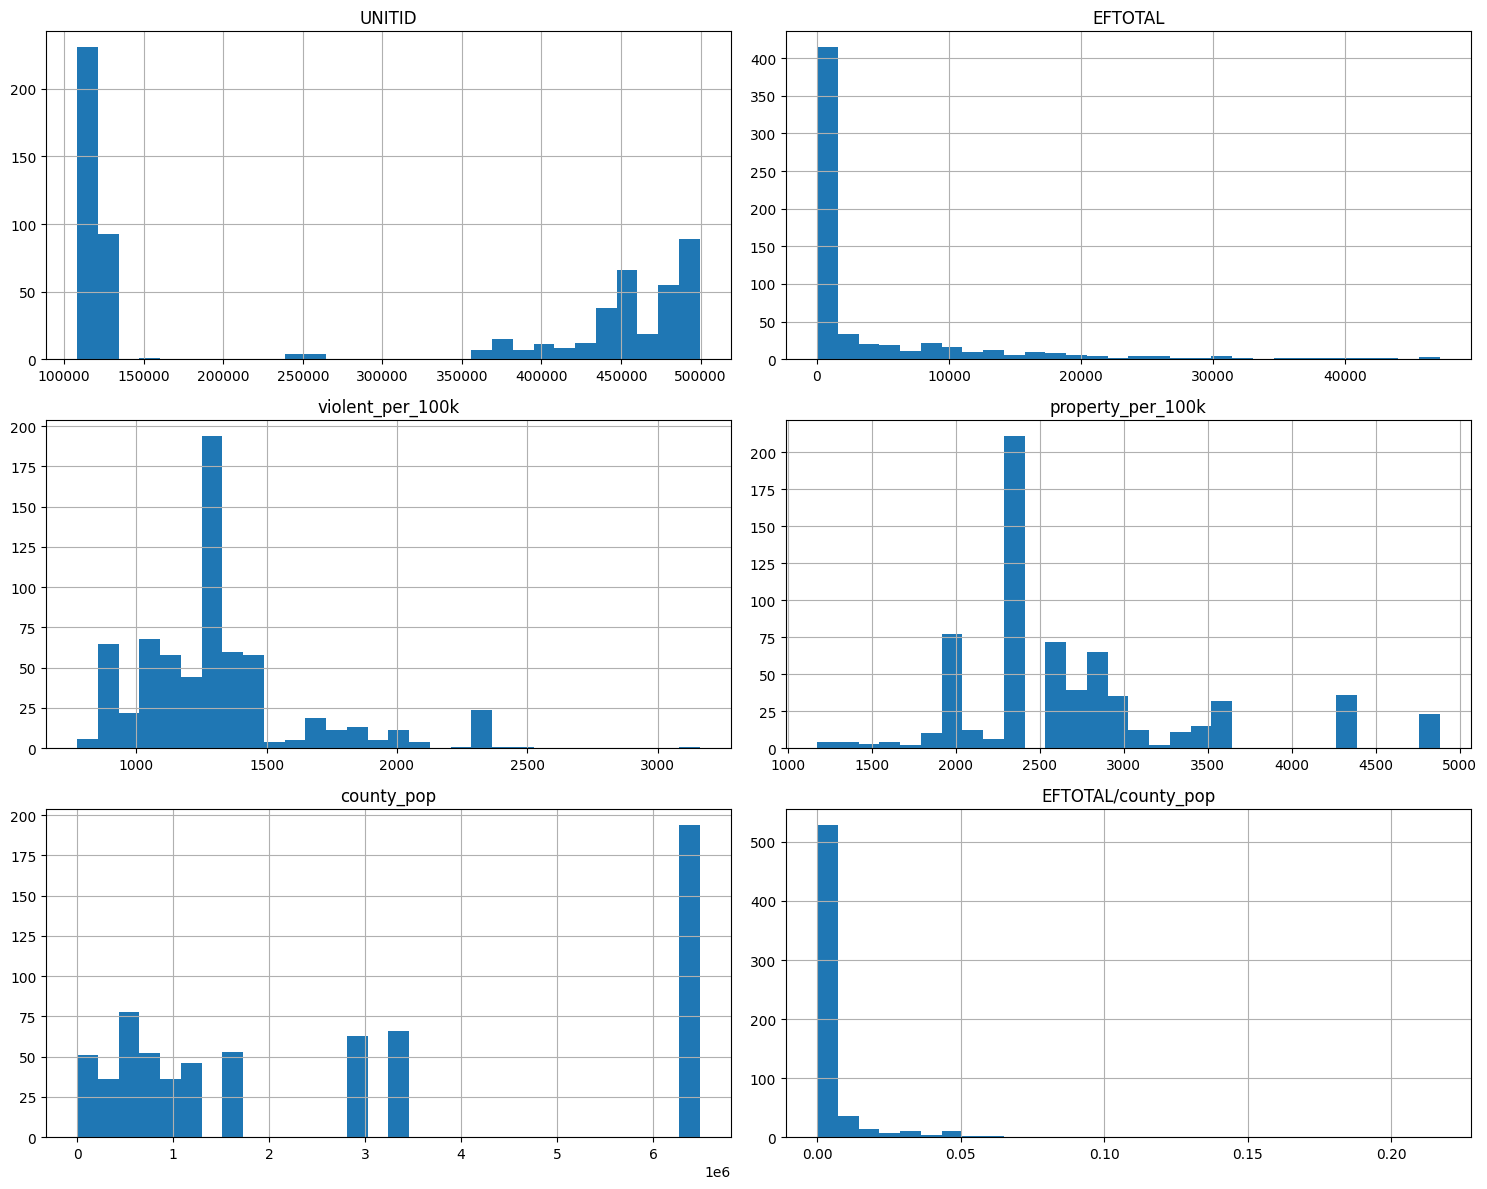

In [62]:
#View distribution curves to figure out which correlation coefficient to use
numeric_df = big_school_df.select_dtypes(include='number')

numeric_df.hist(figsize=(15, 12), bins=30)
plt.tight_layout()
plt.show()

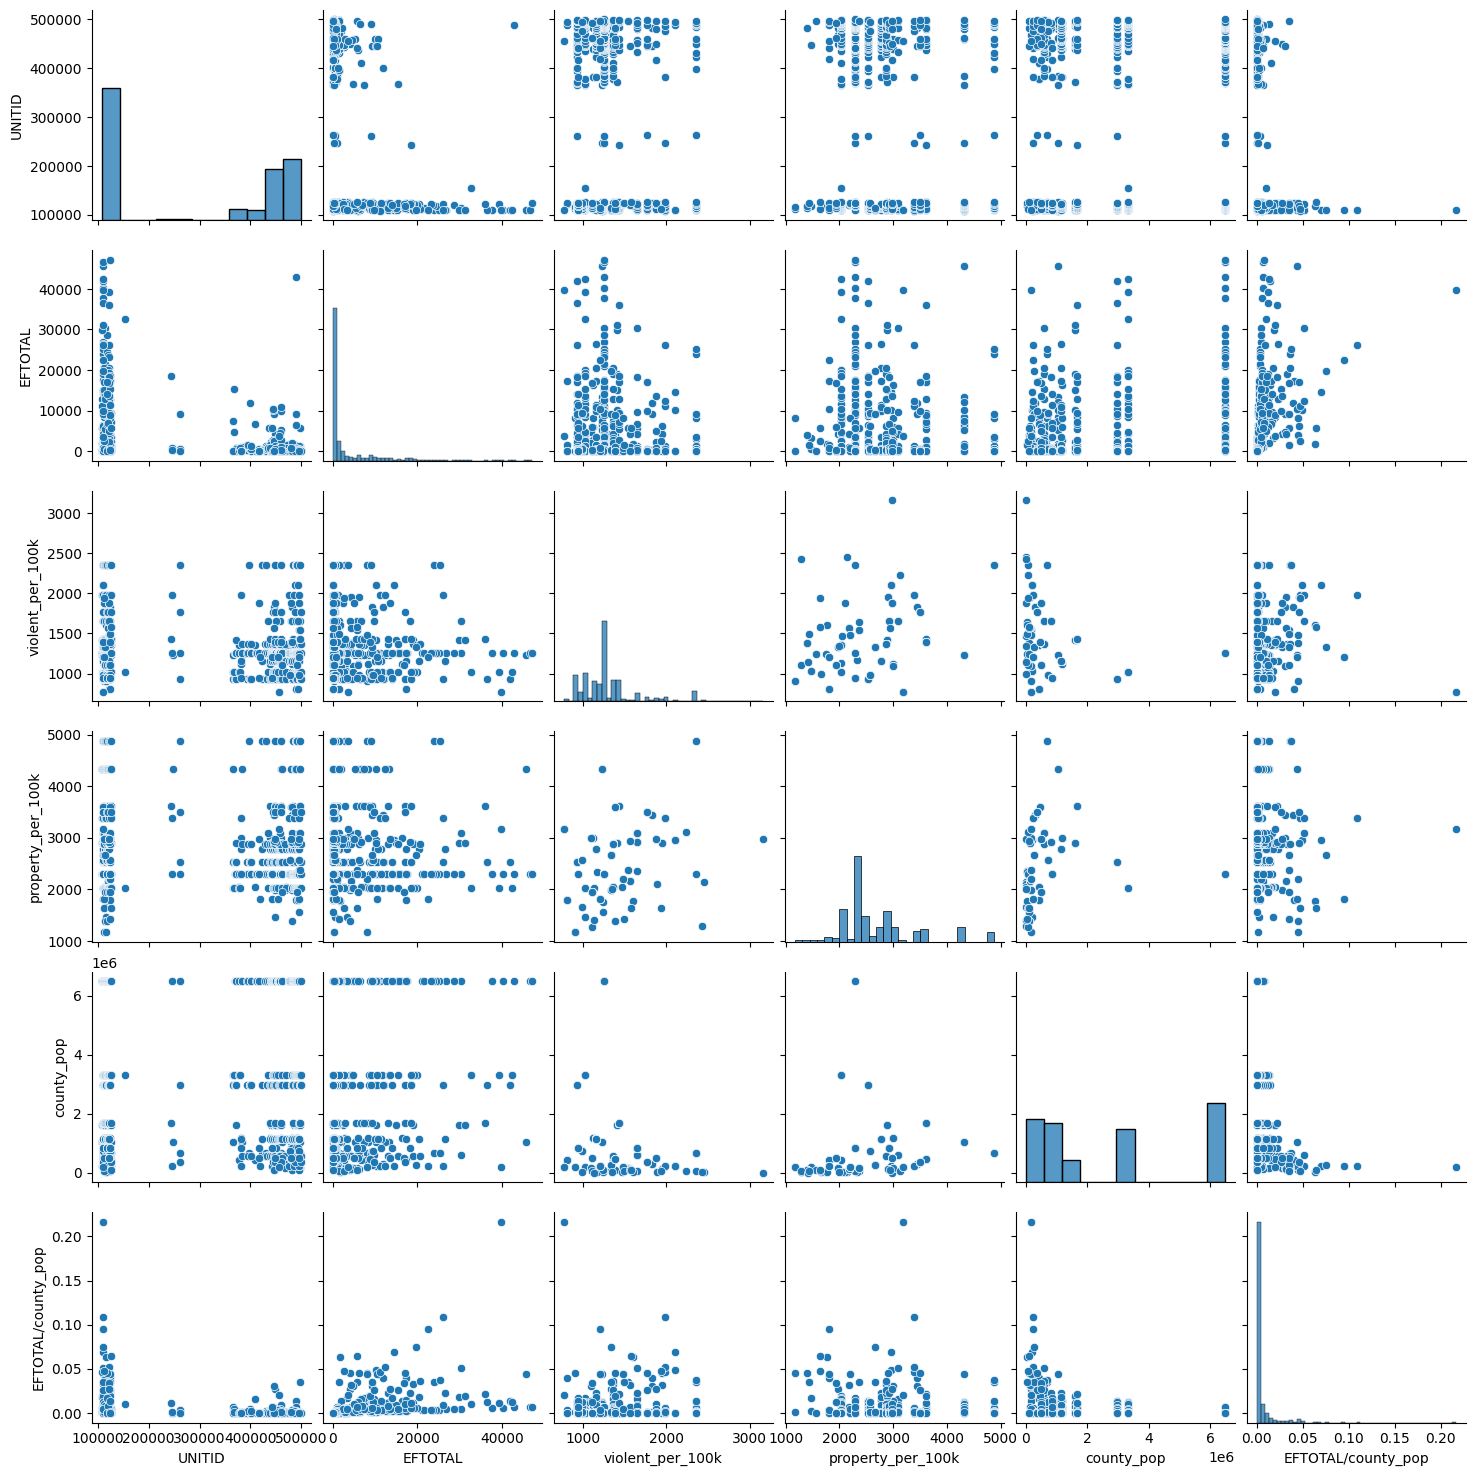

In [63]:
# check pairwise relationship
sns.pairplot(numeric_df)
plt.show()

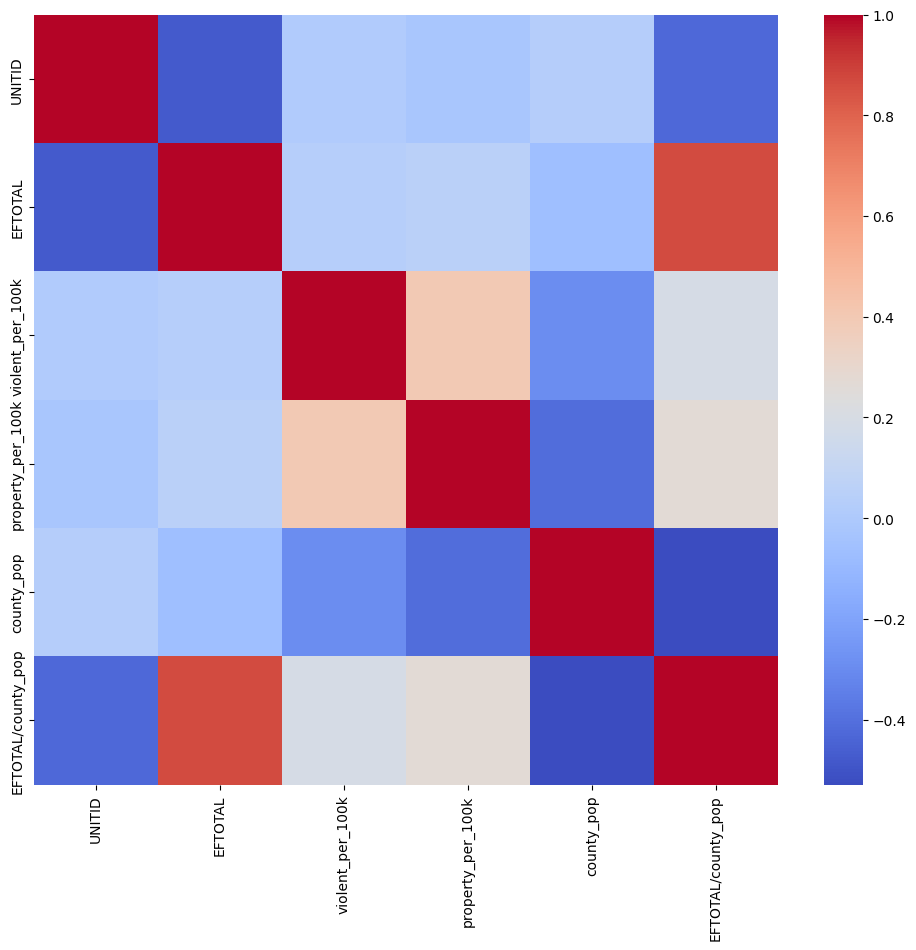

In [64]:
# correlation matrix thing
# I will use spearmans coefficient because most data is skewed like EFTotal and EFTOTAL / POPESTIMATE2024. 

corr_matrix = big_school_df.select_dtypes(include='number').corr(method="spearman")

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.show()

There is little evidence forcorrelation between violent_per_100k and property_per_100k. There is a slight correlation between those two and county population, and those two and enrollment total. This is significant and important because it challenges the previous theory proposed in a paper that college students were more succeptible to be victims of crime.


# Models I guess? rename later


In [65]:
feature_cols = ["violent_per_100k", "property_per_100k", "county_pop", "EFTOTAL/county_pop"]
df_model = big_school_df[feature_cols].replace([np.inf, -np.inf], np.nan).dropna().copy()

# Proxy binary target: top quartile of enrollment share
y = (df_model["EFTOTAL/county_pop"] >= df_model["EFTOTAL/county_pop"].quantile(0.75)).astype(int)

# Avoid leakage by excluding ratio used to define y
X = df_model[["violent_per_100k", "property_per_100k", "county_pop"]]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)
print("Class balance in y_train:")
print(y_train.value_counts(normalize=True))

Train shape: (493, 3) Test shape: (124, 3)
Class balance in y_train:
EFTOTAL/county_pop
0    0.748479
1    0.251521
Name: proportion, dtype: float64


# Defining "College Town": 
We create a binary target where 1 = "college-concentrated county" (top 25% enrollment share) and 0 = not college-concentrated. This is determined by whether a county's student-to-population ratio (EFTOTAL/county_pop) is at or above the 75th percentile.
# Features Used: 
The model only uses three pieces of information per county — violent crime per 100,000 residents, property crime per 100,000 residents, and total county population. Raw enrollment (EFTOTAL) is intentionally excluded because it was used to construct the target variable, which would cause data leakage.
# Train/Test Split (80/20): 
617 school records are split into a training set of 493 (80%) and a test set of 124 (20%), with stratification to preserve the class imbalance (~75% negative, ~25% positive) in both sets.

# Model 1: Random Forest

In [66]:
rf_model = RandomForestClassifier(
    n_estimators=400, random_state=42, class_weight="balanced"
 )

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

print("Random Forest ROC-AUC:", round(roc_auc_score(y_test, y_prob_rf), 4))
print(classification_report(y_test, y_pred_rf, digits=3))

Random Forest ROC-AUC: 0.568
              precision    recall  f1-score   support

           0      0.743     0.559     0.638        93
           1      0.241     0.419     0.306        31

    accuracy                          0.524       124
   macro avg      0.492     0.489     0.472       124
weighted avg      0.617     0.524     0.555       124



This model achieved a ROC-AUC of 0.568 and an overall accuracy of 52.4%. It correctly identified only 41.9% of college-concentrated counties, suggesting crime rates and population have little predictive power in a tree model.

# Modfel 2: KNN 


In [67]:
knn_model = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", KNeighborsClassifier(n_neighbors=9))
])

knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
y_prob_knn = knn_model.predict_proba(X_test)[:, 1]

print("KNN ROC-AUC:", round(roc_auc_score(y_test, y_prob_knn), 4))
print(classification_report(y_test, y_pred_knn, digits=3))

KNN ROC-AUC: 0.6233
              precision    recall  f1-score   support

           0      0.761     0.957     0.848        93
           1      0.429     0.097     0.158        31

    accuracy                          0.742       124
   macro avg      0.595     0.527     0.503       124
weighted avg      0.678     0.742     0.675       124



This model achieved a ROC-AUC of 0.623 and an overall accuracy of 74.2%, though could be mistlead because it mostly just predicted "not a college town" for almost everything, and it only catching 9.7% of actual college-concentrated counties.

# Model 3 Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression

lr_model = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=1000, random_state=42, class_weight="balanced"))
])

lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]

print("Logistic Regression ROC-AUC:", round(roc_auc_score(y_test, y_prob_lr), 4))
print(classification_report(y_test, y_pred_lr, digits=3))

Logistic Regression ROC-AUC: 0.6866
              precision    recall  f1-score   support

           0      0.879     0.548     0.675        93
           1      0.364     0.774     0.495        31

    accuracy                          0.605       124
   macro avg      0.621     0.661     0.585       124
weighted avg      0.750     0.605     0.630       124



This model achieved the best ROC-AUC of 0.687 and an accuracy of 60.5%, correctly identifying 77.4% of college-concentrated counties but with a lot of false positives. It still finds that crime rates alone are a weak predictor of college town status.

## Ethics

Instructions: REPLACE the contents of this cell with your work, including any updates to recover points lost in your proposal feedback

## Team Expectations 

Instructions: REPLACE the contents of this cell with your work, including any updates to recover points lost in your proposal feedback

## Project Timeline Proposal

Instructions: Replace this with your timeline.  **PLEASE UPDATE your Timeline!** No battle plan survives contact with the enemy, so make sure we understand how your plans have changed.  Also if you have lost points on the previous checkpoint fix them